<a href="https://colab.research.google.com/github/roshantac/EVA4/blob/master/Assignment11/Session11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip3 install albumentations

In [2]:
########################################
#  Calling  heavenly Gods
########################################
import torch
import torchvision
import torchvision.transforms as transforms
from dataset import *
from model import *
import torch.nn as nn
import torch.nn.functional as F
#from base_functions import *
from training import *
from torchsummary import summary

# getting the data
trainloader, testloader, testData, classes = getData()



Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Utilize GPU if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model11().to(device)
if device == 'cuda':
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True

# Print Model Summary    
summary(model, input_size=(3, 32, 32))


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,


Learning rate search finished. See the graph with {finder_name}.plot()


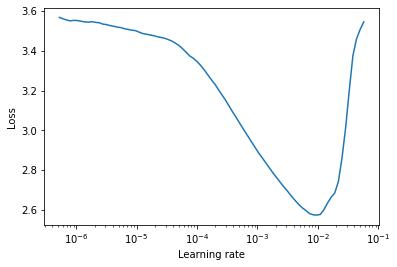

In [4]:
from lr_finder import LRFinder
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=0.1, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [5]:
# Training starts here
Training(24,model,device, trainloader, testloader,.01 )


  0%|          | 0/100 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.430234670639038 Batch_id=99 Accuracy=32.48: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 1.3338, Accuracy: 5161/10000 (51.61%)

EPOCH: 1


Loss=1.241272211074829 Batch_id=99 Accuracy=52.98: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 1.2219, Accuracy: 5773/10000 (57.73%)

EPOCH: 2


Loss=0.8377974033355713 Batch_id=99 Accuracy=63.54: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.9316, Accuracy: 6739/10000 (67.39%)

EPOCH: 3


Loss=0.7731038331985474 Batch_id=99 Accuracy=69.85: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.9663, Accuracy: 6891/10000 (68.91%)

EPOCH: 4


Loss=0.7783190011978149 Batch_id=99 Accuracy=75.33: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.7313, Accuracy: 7523/10000 (75.23%)

EPOCH: 5


Loss=0.5951012372970581 Batch_id=99 Accuracy=80.97: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.6994, Accuracy: 7805/10000 (78.05%)

EPOCH: 6


Loss=0.756808876991272 Batch_id=99 Accuracy=83.30: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.6959, Accuracy: 7962/10000 (79.62%)

EPOCH: 7


Loss=0.40490177273750305 Batch_id=99 Accuracy=87.02: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.6933, Accuracy: 7984/10000 (79.84%)

EPOCH: 8


Loss=0.30743759870529175 Batch_id=99 Accuracy=90.08: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.5373, Accuracy: 8365/10000 (83.65%)

EPOCH: 9


Loss=0.20518629252910614 Batch_id=99 Accuracy=93.07: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.5168, Accuracy: 8428/10000 (84.28%)

EPOCH: 10


Loss=0.118881456553936 Batch_id=99 Accuracy=94.90: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.4898, Accuracy: 8522/10000 (85.22%)

EPOCH: 11


Loss=0.11301097273826599 Batch_id=99 Accuracy=96.06: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.4805, Accuracy: 8610/10000 (86.10%)

EPOCH: 12


Loss=0.08221855759620667 Batch_id=99 Accuracy=97.02: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.5090, Accuracy: 8624/10000 (86.24%)

EPOCH: 13


Loss=0.07420568913221359 Batch_id=99 Accuracy=97.82: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.4842, Accuracy: 8683/10000 (86.83%)

EPOCH: 14


Loss=0.038971707224845886 Batch_id=99 Accuracy=98.43: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.4867, Accuracy: 8657/10000 (86.57%)

EPOCH: 15


Loss=0.04080289974808693 Batch_id=99 Accuracy=98.72: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.4651, Accuracy: 8779/10000 (87.79%)

EPOCH: 16


Loss=0.02993978187441826 Batch_id=99 Accuracy=98.92: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.5065, Accuracy: 8675/10000 (86.75%)

EPOCH: 17


Loss=0.027353748679161072 Batch_id=99 Accuracy=99.08: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.4509, Accuracy: 8786/10000 (87.86%)

EPOCH: 18


Loss=0.011624334380030632 Batch_id=99 Accuracy=99.37: 100%|██████████| 100/100 [01:35<00:00,  1.04it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.4642, Accuracy: 8786/10000 (87.86%)

EPOCH: 19


Loss=0.020502343773841858 Batch_id=99 Accuracy=99.41: 100%|██████████| 100/100 [01:35<00:00,  1.04it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.4561, Accuracy: 8808/10000 (88.08%)

EPOCH: 20


Loss=0.01445240993052721 Batch_id=99 Accuracy=99.50: 100%|██████████| 100/100 [01:35<00:00,  1.04it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.4661, Accuracy: 8820/10000 (88.20%)

EPOCH: 21


Loss=0.009739031083881855 Batch_id=99 Accuracy=99.56: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.4602, Accuracy: 8821/10000 (88.21%)

EPOCH: 22


Loss=0.005843663588166237 Batch_id=99 Accuracy=99.68: 100%|██████████| 100/100 [01:35<00:00,  1.05it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.4506, Accuracy: 8838/10000 (88.38%)

EPOCH: 23


Loss=0.015407610684633255 Batch_id=99 Accuracy=99.70: 100%|██████████| 100/100 [01:34<00:00,  1.05it/s]



Test set: Average loss: 0.4491, Accuracy: 8855/10000 (88.55%)



In [11]:
# Calsswise accuracy 
ClassTestAccuracy(testloader,device,model,classes)

Accuracy of plane : 95 %
Accuracy of   car : 100 %
Accuracy of  bird : 78 %
Accuracy of   cat : 74 %
Accuracy of  deer : 85 %
Accuracy of   dog : 87 %
Accuracy of  frog : 90 %
Accuracy of horse : 87 %
Accuracy of  ship : 93 %
Accuracy of truck : 89 %


In [0]:

#MissClassifedImage(testData,model,device,3,classes)

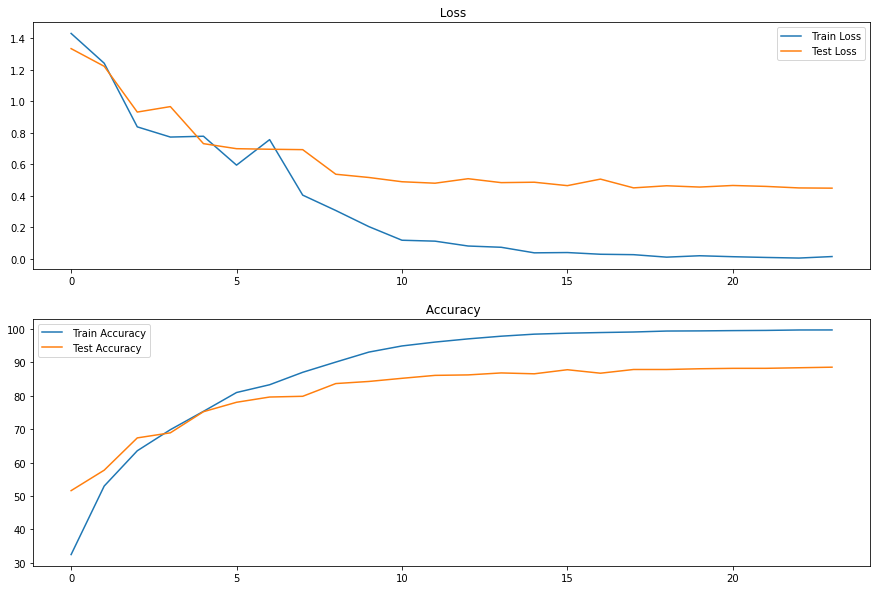

In [12]:
plotPerformanceGraph( )

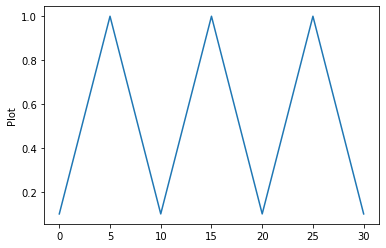

In [9]:
import matplotlib.pyplot as plt

def OneCyclePolicy(LRmax, step, iterations):
    LRmin = LRmax/10;
    LRvalues =[]
    for x in range(0,iterations+1):
        cycle = int(1+ (x/(2*step)))
        a = abs((x/step)-(2*cycle)+1)
        LRt = LRmin + ((LRmax-LRmin)*(1-a))
        LRvalues.append(LRt)
    return LRvalues
val = OneCyclePolicy(1,5,30)
plt.plot(val)
plt.ylabel('Plot')
plt.show()


